# Twitter Group: Statistical Analysis with R

#### I've made individual dataframes (tables) out of our dataset. The whole thing is represented as: allMarine. 

**Tables:**  
    + marine = all relevant variables;  
    + articlesMar = articles with their variables;  
    + usersMar = users with their variables;  
    + tweetsMar = tweets with their variables.  

#### All tables include keys (IDs) from other tables, relating to the main table.

**Analysis tables** for graphs (so far):  
    * civilSbots = User civil society, botornot = 1.  
    * civilSnots = User civil society, botornot = 0 or 1.  




The R workshop taught by the R Study Group at the Research Commons gave us the names of the R packages that have to be imported. These are two libraries that help to clean up and manipulated data tables.

Btw, R Studio has some [kickass cheat sheets](  https://resources.rstudio.com/rstudio-cheatsheets) organized by topic, all you need really. 

In [1]:
library("tidyverse")
library("tidyr")
library("dplyr")


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


First, I import the unedited, original Twitter data as allMarine. The column and row structure is shown below, in [8].

In [2]:
allMarine <- read_csv("609C_Twitter_Data_Cleaned.csv")
str(allMarine)

Parsed with column specification:
cols(
  tweetID = col_integer(),
  citCount = col_integer(),
  artID = col_integer(),
  postURL = col_character(),
  postRT = col_character(),
  postSumm = col_character(),
  authName = col_character(),
  authDescr = col_character(),
  handle = col_character(),
  post_authFoll = col_integer(),
  authCount = col_integer(),
  botornot = col_integer(),
  usrTyp = col_character(),
  tweetAt = col_integer(),
  hashtag = col_integer(),
  likes = col_integer(),
  replies = col_integer(),
  retweets = col_integer()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	920 obs. of  18 variables:
 $ tweetID      : int  7152264 9595159 4875662 5454649 5454648 6047394 6047395 6524375 9595161 5224831 ...
 $ citCount     : int  0 5 2 8 8 0 0 0 5 2 ...
 $ artID        : int  2400158 2889631 1992308 2095516 2095516 2194063 2194063 2288168 2889631 2049822 ...
 $ postURL      : chr  "http://twitter.com/watermicrobe/status/476258513875107840" "https://twitter.com/cdkassotis/status/567068656832503810" "http://twitter.com/Algalita/status/413851277844439040" "http://twitter.com/duncknowsstuff/status/431095417087221760" ...
 $ postRT       : chr  "MicrobialLife|" "martiwag|" "MarineDebris|" "irisherself|" ...
 $ postSumm     : chr  "#Microplastics from facial scrubs can transport organic pollutants (PBDEs) into marine crustacea http://t.co/iECDvf3Rc5 by @bra "New paper in @EnvSciTech: \"#Microplastics in Four Estuarine Rivers in the Chesapeake Bay, U.S.A.\" http://t.co/Boblg4Anqo" "When it comes to #plasticpollution partic

In [4]:
head(allMarine)
tail(allMarine)

tweetID,citCount,artID,postURL,postRT,postSumm,authName,authDescr,handle,post_authFoll,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets
7152264,0,2400158,http://twitter.com/watermicrobe/status/476258513875107840,MicrobialLife|,#Microplastics from facial scrubs can transport organic pollutants (PBDEs) into marine crustacea http://t.co/iECDvf3Rc5 by @brad_rmitenviro,Ameet Pinto,"Environmental Engineer. Explore, Learn, Share, Apply. Be Happy.",watermicrobe,711,7,0,7,1,1,1,0,0
9595159,5,2889631,https://twitter.com/cdkassotis/status/567068656832503810,martiwag|,"New paper in @EnvSciTech: ""#Microplastics in Four Estuarine Rivers in the Chesapeake Bay, U.S.A."" http://t.co/Boblg4Anqo",Chris Kassotis,"Postdoc @DukeEnvironment working on #endocrinedisruptors, #flameretardants, & #obesity. PhD @Mizzou studying #fracking. Amateur winemaker, and avid runner.",cdkassotis,1150,18,0,7,1,1,2,0,0
4875662,2,1992308,http://twitter.com/Algalita/status/413851277844439040,MarineDebris|,"When it comes to #plasticpollution particles, does size matter? Study on annual variation via @MarineDebris http://t.co/ERZt9iTVnX",Algalita,We're a nonprofit committed to solving the plastic pollution crisis in our oceans. We educate the public & conduct scientific research.,Algalita,1372,20,0,13,1,1,1,0,3
5454649,8,2095516,http://twitter.com/duncknowsstuff/status/431095417087221760,irisherself|,@SolimanAdam @Meeresmuell: Polybromind diphenyl ethers in fish tissue indicator plastic contamination marine habitats http://t.co/2Ssc3JLoAa,duncknowsstuff,"Generally flawed but trying to be good! Too dumb to know something can't be done! Personal musings on a world of positivity, ironies & living life to the full.",duncknowsstuff,703,20,0,6,1,0,1,0,0
5454648,8,2095516,http://twitter.com/SolimanAdam/status/431093507130810368,irisherself|,@SolimanAdam @Meeresmuell: Polybromind diphenyl ethers in fish tissue indicator plastic contamination marine habitats http://t.co/2Ssc3JLoAa,Adam Soliman,"Director of the Fisheries Law Centre, Researcher focused on legal and economic issues in Fisheries",SolimanAdam,19530,20,0,7,1,0,1,0,0
6047394,0,2194063,http://twitter.com/MotionGfxCoUk/status/446993150801084417,IanHarrold|,New #marine #pollution bulletin for #plastic in #tamar estuary @TamarProject http://t.co/HZQ84LYBW2,MotiongraphicsCoUk,"Motion graphic design. Creators of 'Plastic Pollution Project, an infographic film'. https://vimeo.com/85544615",MotionGfxCoUk,67,17,0,1,1,1,1,0,0


tweetID,citCount,artID,postURL,postRT,postSumm,authName,authDescr,handle,post_authFoll,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets
7377155,0,2453275,https://twitter.com/GlobalGarbage/status/499229590817357825,NULL,Kelp Gulls killed and injured by discarded monofilament lines at a marine recreational fishery in northern Patagonia http://t.co/oSC9CeNgEh,Global Garbage,Official Twitter of #GlobalGarbage. Tweets on #marinelitter #marinedebris #plasticpollution #plasticwaste #microplastics. Updated by @FabianoBarretto,GlobalGarbage,3220,17,1,99,NA,NA,1,NA,NA
9220105,12,2807287,https://twitter.com/GlobalGarbage/status/525359477848305664,NULL,#Marinelitter in Mediterranean sandy littorals: Spatial distribution patterns along central Italy coastal dunes http://t.co/NrCORkzaX2,Global Garbage,Official Twitter of #GlobalGarbage. Tweets on #marinelitter #marinedebris #plasticpollution #plasticwaste #microplastics. Updated by @FabianoBarretto,GlobalGarbage,3220,17,1,99,NA,NA,2,NA,NA
5454656,8,2095516,http://twitter.com/LixoMarinho/status/430674567552450560,NULL,Polybrominated diphenyl ethers (PBDEs) in fish tissue may be an indicator of plastic contamination in marine habitats http://t.co/CK1mrvngV5,Lixo Marinho,Twitter oficial do Portal do Lixo Marinho. Atualizado por @FabianoBarretto. https://www.facebook.com/ablm.org.br,LixoMarinho,1673,20,1,99,NA,NA,1,NA,NA
5224837,2,2049822,http://twitter.com/FabianoBarretto/status/425265776853917696,NULL,Leaching of plastic additives to marine organisms http://t.co/Icz4n9nzgI #marinelitter #marinedebris #BisphenolA,Fabiano Barretto,Project Manager of @GlobalGarbage. Tweets on #marinelitter #marinedebris #plasticpollution #plasticwaste #microplastics. https://www.facebook.com/GlobalGarbage,FabianoBarretto,694,18,0,99,NA,NA,1,NA,NA
8196203,12,2604644,https://twitter.com/FabianoBarretto/status/499914716706537472,NULL,Marine litter ensemble transport simulations in the southern North Sea http://t.co/IvGsbx37j7 #marinedebris #marinelitter,Fabiano Barretto,Project Manager of @GlobalGarbage. Tweets on #marinelitter #marinedebris #plasticpollution #plasticwaste #microplastics. https://www.facebook.com/GlobalGarbage,FabianoBarretto,694,17,0,99,NA,NA,1,NA,NA
5224840,2,2049822,http://twitter.com/MarineDebris/status/425323184871600128,NULL,Leaching of plastic additives to marine organisms http://t.co/TnXj1P5OZQ #marinelitter #marinedebris #BisphenolA,Marine Debris,Alternative account of @GlobalGarbage. Tweets on #marinelitter #marinedebris #oceanlitter #plasticwaste #microplastics. Updated by @FabianoBarretto,MarineDebris,1975,18,1,99,NA,NA,1,NA,NA


From a previous run, I had already made a table that only contains the variables we are going to be exploring. I called this table marVar and exported it as a csv. I'm now importing marVar.csv again, but calling it marine. Make sense? marine is now the table that, I think, contains all the variables we need for the study.

**articlesMar, usersMar** and **tweetsMar** are tables that contains only the following (selected) columns:

In [6]:
articlesMar <- select(allMarine, artID, citCount, tweetID, handle, hashtag, likes, replies, retweets, botornot)

(Notice the `head()` function that prints out the top of each table. The bottom is called with `tail()`)

In [7]:
usersMar <- select(allMarine, handle, tweetID, post_authFoll, botornot, artID)
head(usersMar)

handle,tweetID,post_authFoll,botornot,artID
watermicrobe,7152264,711,0,2400158
cdkassotis,9595159,1150,0,2889631
Algalita,4875662,1372,0,1992308
duncknowsstuff,5454649,703,0,2095516
SolimanAdam,5454648,19530,0,2095516
MotionGfxCoUk,6047394,67,0,2194063


In [8]:
tweetsMar <- select(allMarine, artID, tweetID, postSumm, postRT, handle, authCount, botornot, usrTyp, tweetAt, hashtag, likes, replies, retweets)
head(tweetsMar)

artID,tweetID,postSumm,postRT,handle,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets
2400158,7152264,#Microplastics from facial scrubs can transport organic pollutants (PBDEs) into marine crustacea http://t.co/iECDvf3Rc5 by @brad_rmitenviro,MicrobialLife|,watermicrobe,7,0,7,1,1,1,0,0
2889631,9595159,"New paper in @EnvSciTech: ""#Microplastics in Four Estuarine Rivers in the Chesapeake Bay, U.S.A."" http://t.co/Boblg4Anqo",martiwag|,cdkassotis,18,0,7,1,1,2,0,0
1992308,4875662,"When it comes to #plasticpollution particles, does size matter? Study on annual variation via @MarineDebris http://t.co/ERZt9iTVnX",MarineDebris|,Algalita,20,0,13,1,1,1,0,3
2095516,5454649,@SolimanAdam @Meeresmuell: Polybromind diphenyl ethers in fish tissue indicator plastic contamination marine habitats http://t.co/2Ssc3JLoAa,irisherself|,duncknowsstuff,20,0,6,1,0,1,0,0
2095516,5454648,@SolimanAdam @Meeresmuell: Polybromind diphenyl ethers in fish tissue indicator plastic contamination marine habitats http://t.co/2Ssc3JLoAa,irisherself|,SolimanAdam,20,0,7,1,0,1,0,0
2194063,6047394,New #marine #pollution bulletin for #plastic in #tamar estuary @TamarProject http://t.co/HZQ84LYBW2,IanHarrold|,MotionGfxCoUk,17,0,1,1,1,1,0,0


*You can ignore this for now. I just copied a function in there I'd like to use.*  

`gather(data, key, value, ..., na.rm = FALSE,
convert = FALSE, factor_key = FALSE)`  

*Though, `gather()` is an interesting tool that, had I know it existed 2 months ago, it'd saved me a ton of work on Excel.*  
<sub><sup>*Btw, R puts Excel into perspective: All the time wasted into figuring out Excel could've been used to learn this much more intuitive tool! The price of wisdom, I suppose.*</sub></sup>*

This gets a bit more complicated but, basically, I took **tweetsMar**, dropped all rows that had no data for engagement, grouped the table by user handles and created new columns adding the totals for each user. The new table is called **tweetsByHandle**.

In [9]:
options(digits = 3)
tweetsByHandle <- tweetsMar %>% 
drop_na(retweets, likes, replies) %>%
group_by(handle)%>%
mutate(total_likes = sum(likes), total_replies = sum(replies), total_retweets = sum(retweets))%>%
select(handle, tweetID, botornot, usrTyp, artID, total_likes, total_replies, total_retweets)

tweetsByHandle[order(-tweetsByHandle$total_likes),]
head(tweetsByHandle)



handle,tweetID,botornot,usrTyp,artID,total_likes,total_replies,total_retweets
PlasticLitter,8397522,1,2,2644945,107,0,7
PlasticLitter,8671963,1,2,2694525,107,0,7
PlasticLitter,8776214,1,2,2713947,107,0,7
PlasticLitter,8799766,1,2,2718864,107,0,7
PlasticLitter,8949129,1,2,2748924,107,0,7
PlasticLitter,3477388,2,Civil society organisation,1732572,107,0,7
GlobalGarbage,4654531,1,2,1951574,107,1,72
GlobalGarbage,4875668,1,2,1992311,107,1,72
GlobalGarbage,5638312,1,2,2118463,107,1,72
GlobalGarbage,7360752,1,2,2449602,107,1,72


handle,tweetID,botornot,usrTyp,artID,total_likes,total_replies,total_retweets
watermicrobe,7152264,0,7,2400158,1,0,0
cdkassotis,9595159,0,7,2889631,2,0,0
Algalita,4875662,0,13,1992308,2,0,4
duncknowsstuff,5454649,0,6,2095516,1,0,0
SolimanAdam,5454648,0,7,2095516,1,0,0
MotionGfxCoUk,6047394,0,1,2194063,1,0,0


With these two steps, I make two tables out of all "Civil society organisation" users: one for bots, **civilSbots**, and one for nots, **civilSnots**. 

## Graphs 
#### (Work in Progress)

[62] is the most promising so far. Needs formatting though!

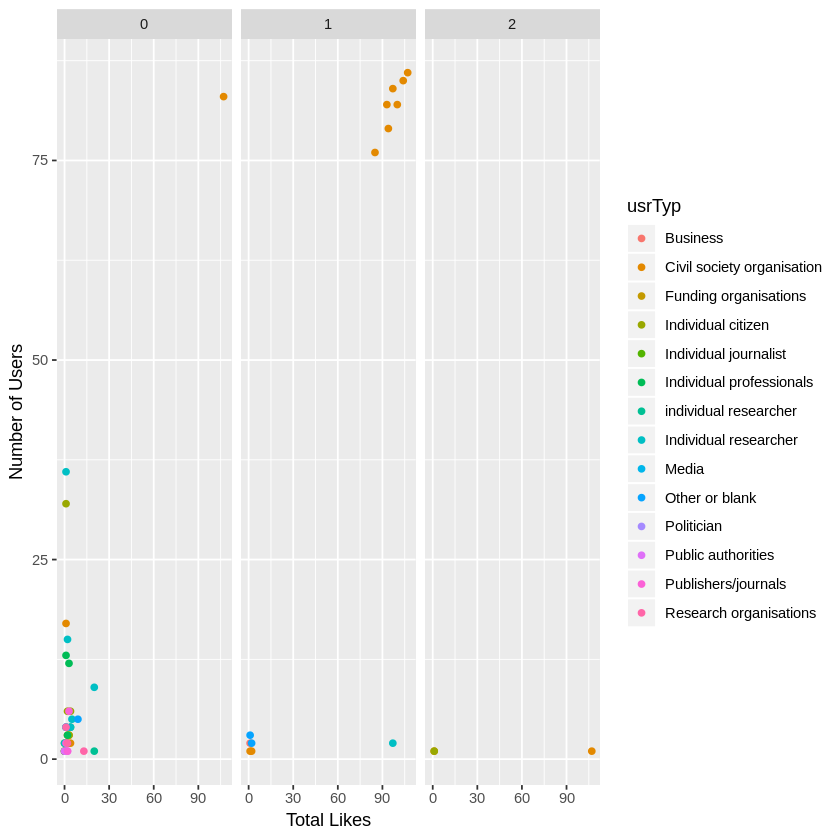

In [20]:
a <- ggplot(tweetsByHandle, aes(x = total_likes, fill = usrTyp, color = usrTyp)) + geom_point(stat="count") + facet_wrap(~botornot)
a + labs(x = "Total Likes") + labs(y = "Number of Users")

In [12]:
head(tweetsByHandle)

handle,tweetID,botornot,usrTyp,artID,total_likes,total_replies,total_retweets
watermicrobe,7152264,0,7,2400158,1,0,0
cdkassotis,9595159,0,7,2889631,2,0,0
Algalita,4875662,0,13,1992308,2,0,4
duncknowsstuff,5454649,0,6,2095516,1,0,0
SolimanAdam,5454648,0,7,2095516,1,0,0
MotionGfxCoUk,6047394,0,1,2194063,1,0,0


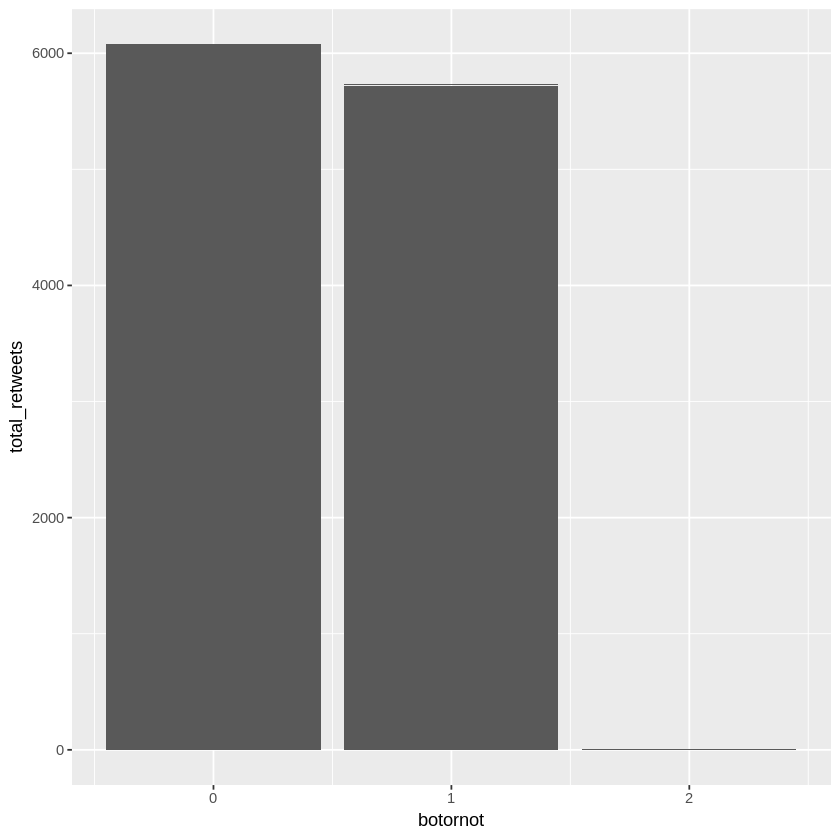

In [11]:
ggplot(tweetsByHandle, aes(x = botornot, y = total_retweets)) + geom_bar(stat="identity")

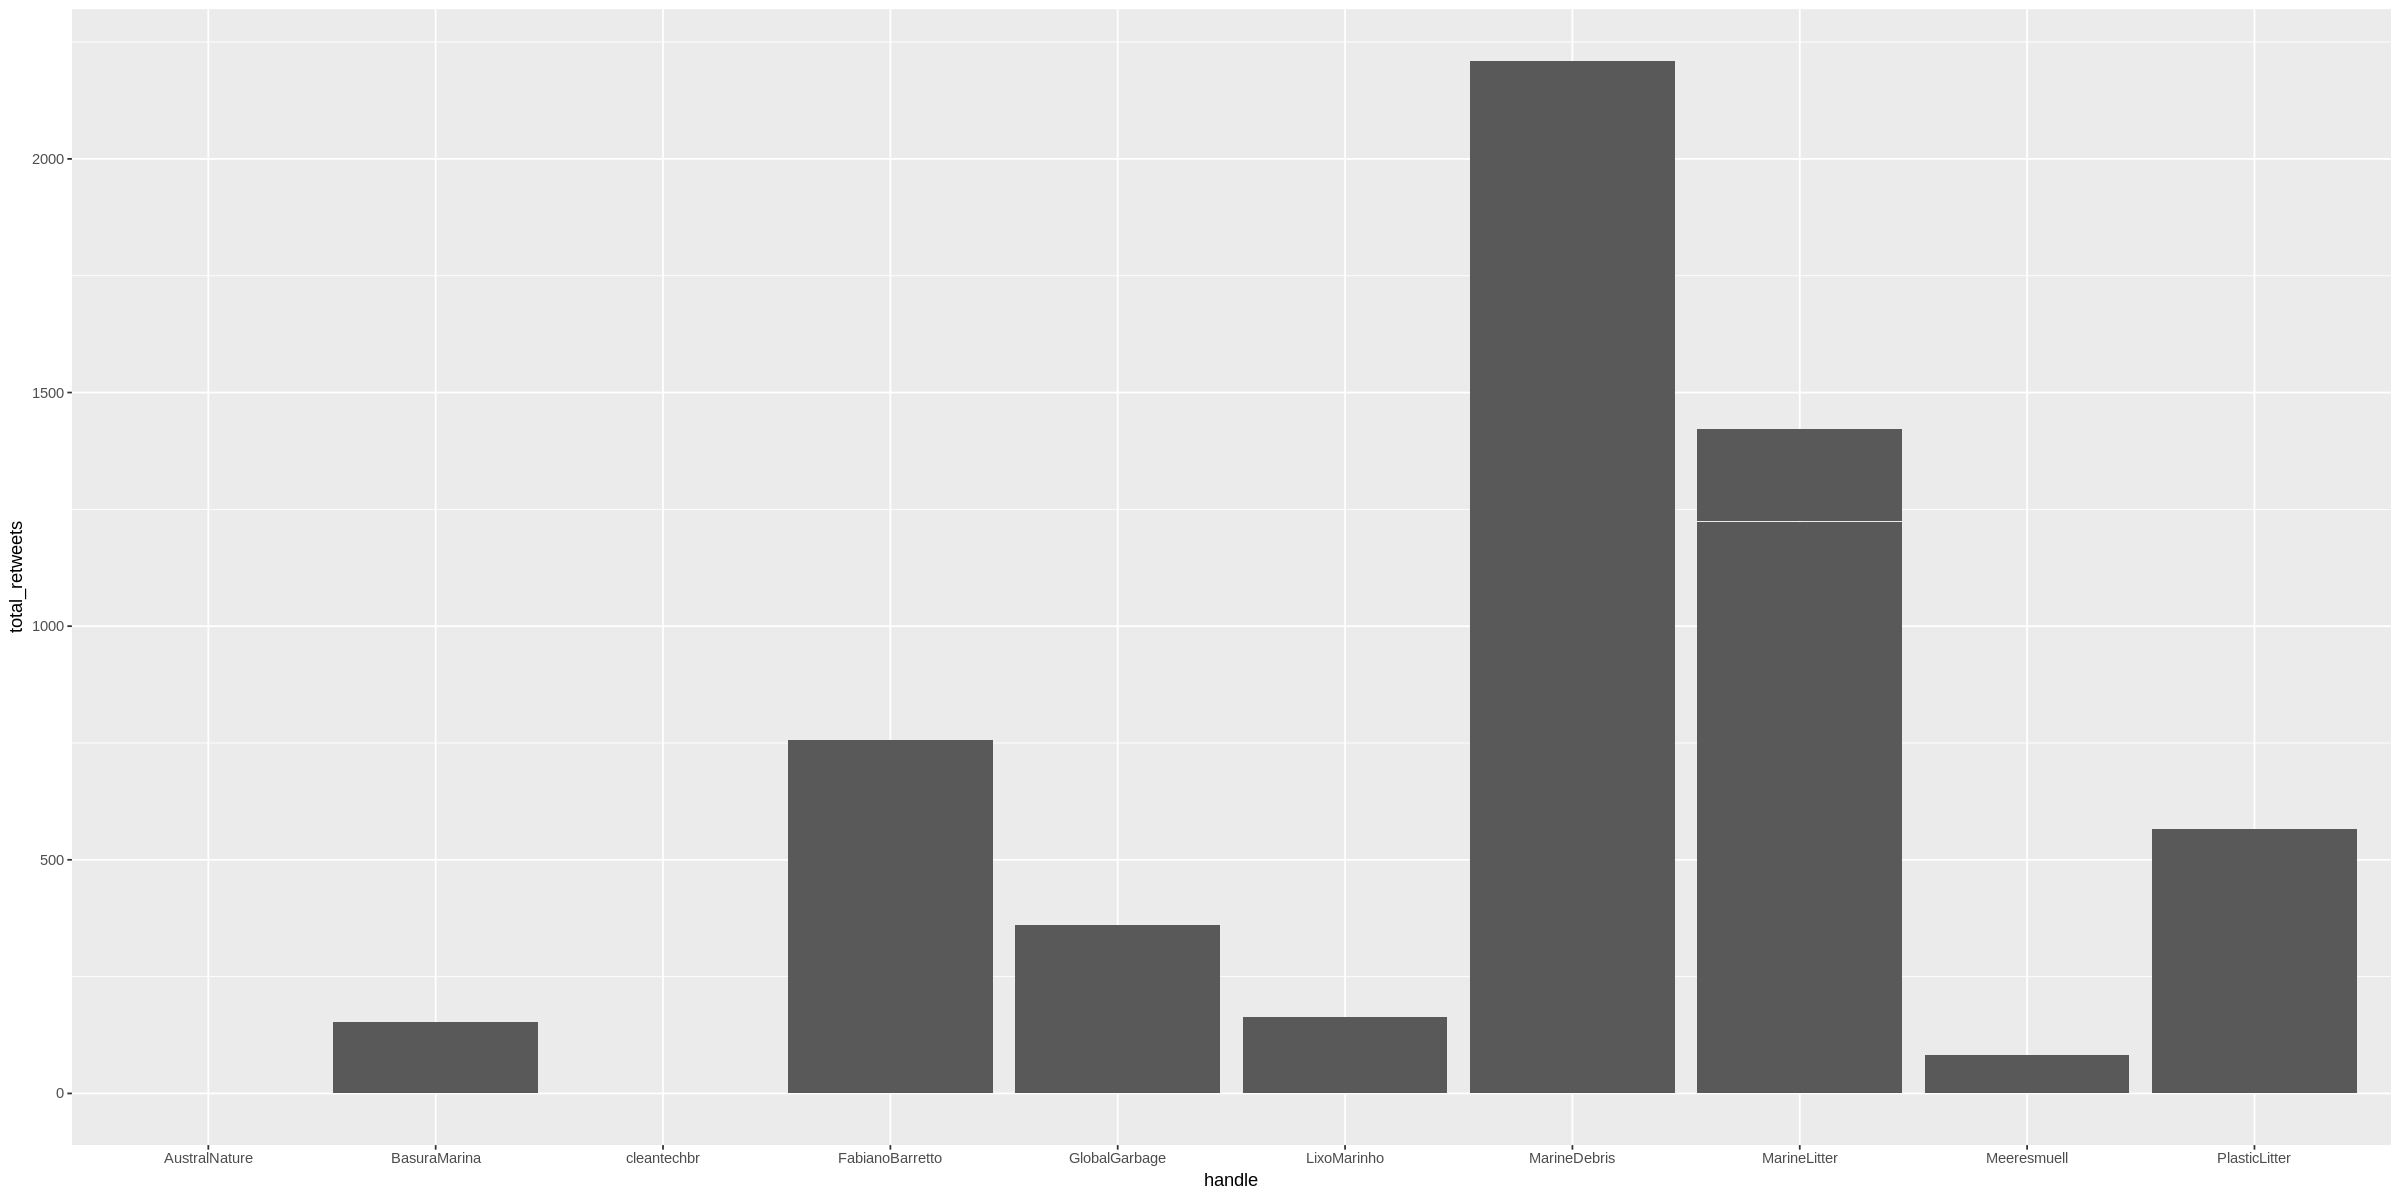

In [286]:
ggplot(civilSbots, aes(x = botornot, y= total_retweets)) + geom_bar(stat="identity") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


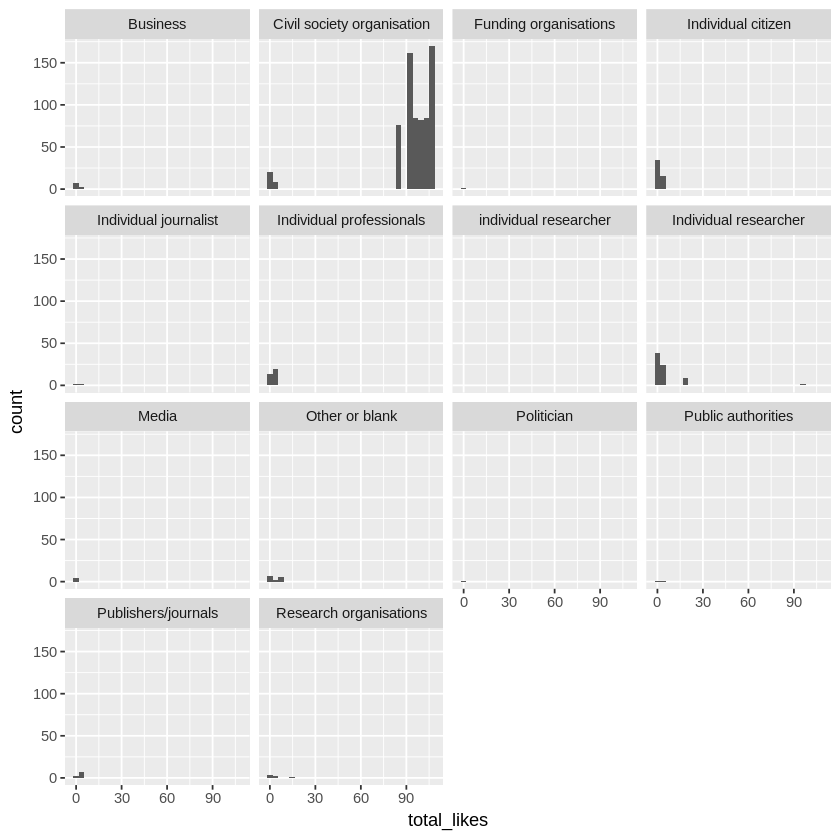

In [30]:
artics <- group_by(tweetsByHandle, artID)
ggplot(artics, aes(x = total_likes)) +
  geom_bar(stat="bin") + facet_wrap( ~ usrTyp)

In [101]:
options(digits=3)
botsEng <- marine %>%
group_by(handle) %>%
summarise(engaged = mean(engage), followers = mean(post_authFoll), bot = median(botornot)) %>% filter(bot %in% c("1"))
head(userEng)
tail(userEng)

handle,engaged,followers,bot
AgendaGreen,1.00,149,1
AustralNature,2.00,1098,1
BasuraMarina,1.14,191,1
cleantechbr,1.00,15503,1
diywaterhybrid,1.00,2113,1
FabianoBarretto,1.25,694,1


handle,engaged,followers,bot
Meeresmuell,1.24,188,1
osparcomm,1.00,3486,1
PlasticLitter,1.39,920,1
Portsmouth_IR,1.00,42,1
SGEAnalytical,1.00,2954,1
ToxAndBeyond,1.00,193,1


Warning message:
“Transformation introduced infinite values in continuous y-axis”

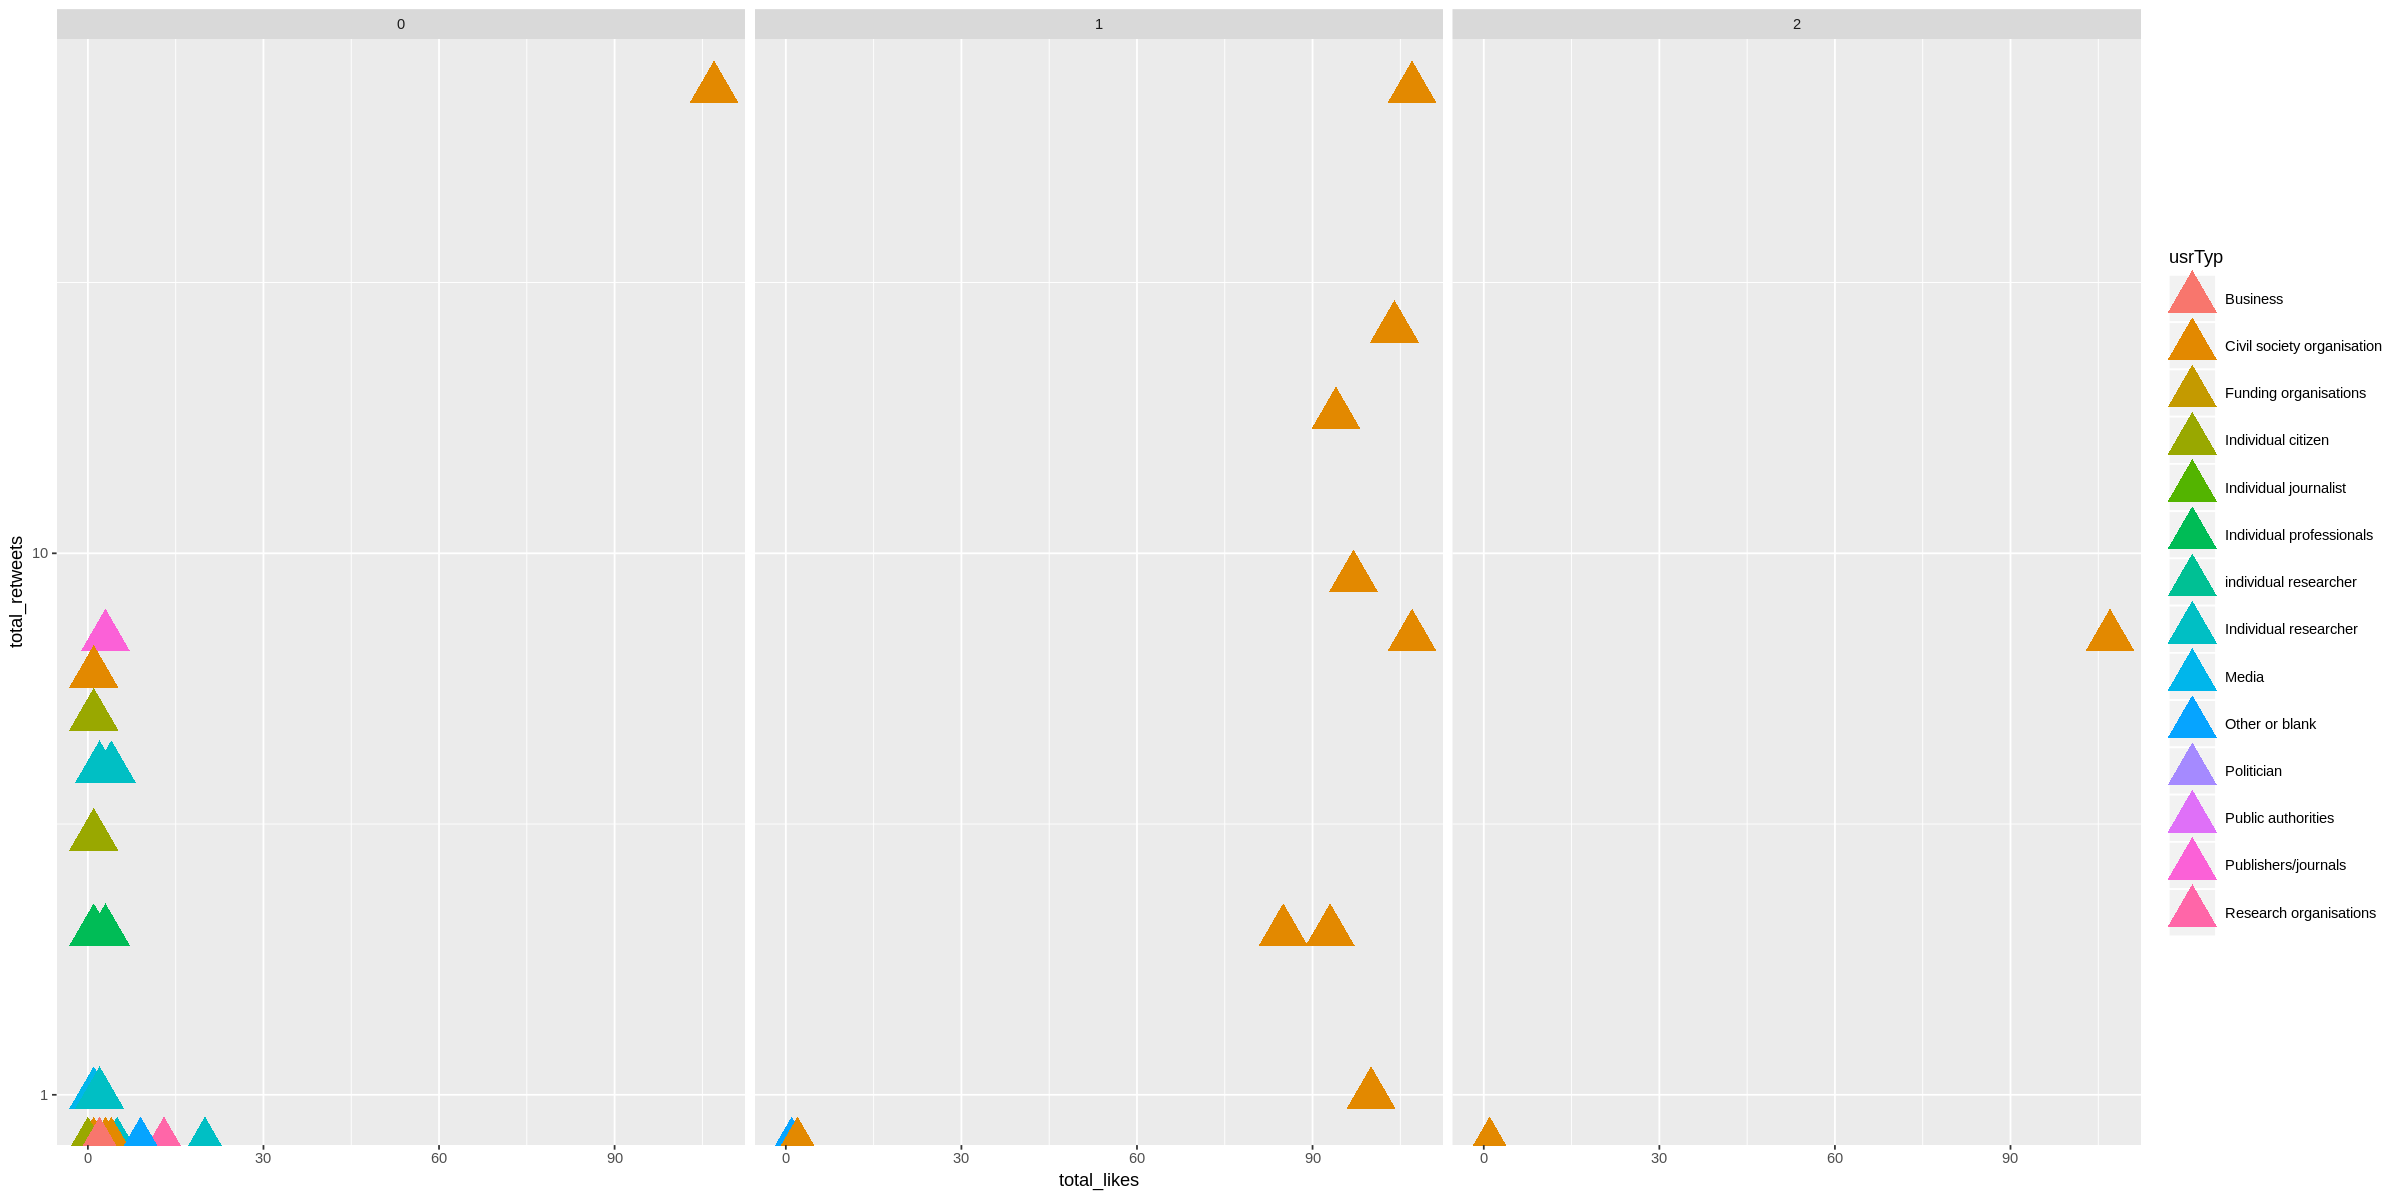

In [210]:
ggplot(tweetsByHandle, aes(x=total_likes, y=usrTyp, color = botornot)) +
    geom_point(size = 10, alpha = 1, shape = "triangle") +scale_y_log10()+facet_wrap( ~ botornot)

In [38]:
handlesSum <- handles %>% select(., citCount, artID, handle, post_authFoll, botornot, usrTyp)
head(handlesSum)

ERROR: Error in eval(lhs, parent, parent): object 'handles' not found


In [142]:
marine <- marine %>% mutate(engage = likes + replies + retweets)
head(marine)


citCount,artID,postRT,postSumm,handle,post_authFoll,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets,engage
12,2459469,A4GL,#GreatLakes accumulate #litter just like the #ocean. A new paper puts this into context and IDs microbes on #trash http://t.co/zUla6n01Fx,ILEnviroLawBlog,537,21,0,Individual journalist,0,1,1,0,0,1
12,2459469,A4GL,#GreatLakes accumulate #litter just like the #ocean. A new paper puts this into context and IDs microbes on #trash http://t.co/zUla6n01Fx,laura261,80,21,0,Individual researcher,0,1,1,0,0,1
12,2459469,A4GL,#GreatLakes accumulate #litter just like the #ocean. A new paper puts this into context and IDs microbes on #trash http://t.co/zUla6n01Fx,DeanaGendron,434,21,0,Individual citizen,0,1,1,0,0,1
12,2459469,A4GL,#GreatLakes accumulate #litter just like the #ocean. A new paper puts this into context and IDs microbes on #trash http://t.co/zUla6n01Fx,PR_Czar,1262,21,0,Individual journalist,0,1,1,0,0,1
12,2459469,A4GL,#GreatLakes accumulate #litter just like the #ocean. A new paper puts this into context and IDs microbes on #trash http://t.co/zUla6n01Fx,MannyELPC,310,21,3,Unknown,0,1,1,0,0,1
2,1897274,AlexDavidRogers,Study shows that microplastics can be transferred across trophic levels in marine foodwebs: http://t.co/gm5p5vgl3i,Elpipster,130,17,0,Individual researcher,0,0,1,0,0,1


In [143]:
options(digits=10)
botEng <- marine %>% filter(botornot %in% c("1"))
head(botEng)
tail(botEng)

citCount,artID,postRT,postSumm,handle,post_authFoll,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets,engage
2,1992308,AlgalitaMarineDebris,"When it comes to #plasticpollution particles, does size matter? Study on annual variation via @MarineDebris http://t.co/ERZt9iTVnX",MarineDebris,1975,20,1,Civil society organisation,1,1,1,0,0,1
12,2466086,GlobalGarbage,Quality assessment of the blue mussel (Mytilus edulis): Comparison between commercial and wild types http://t.co/0InQZvbCq7 #marinedebris,osparcomm,3486,17,1,Other or blank,0,1,1,0,0,1
12,2644945,GlobalGarbage,Deepwater #marinelitter densities and composition from submersible video-transects around the ABC-islands http://t.co/4BKi2Wlzf7 #Caribbean,MarineDebris,1975,16,1,Civil society organisation,0,1,0,0,0,0
12,2644945,GlobalGarbage,Deepwater #marinelitter densities and composition from submersible video-transects around the ABC-islands http://t.co/4BKi2Wlzf7 #Caribbean,FabianoBarretto,694,16,1,Civil society organisation,0,1,0,0,0,0
12,2644945,GlobalGarbage,Deepwater #marinelitter densities and composition from submersible video-transects around the ABC-islands http://t.co/4BKi2Wlzf7 #Caribbean,Meeresmuell,188,16,1,Civil society organisation,0,1,0,0,0,0
12,2644945,GlobalGarbage,Deepwater #marinelitter densities and composition from submersible video-transects around the ABC-islands http://t.co/4BKi2Wlzf7 #Caribbean,BasuraMarina,191,16,1,Civil society organisation,0,1,0,0,0,0


citCount,artID,postRT,postSumm,handle,post_authFoll,authCount,botornot,usrTyp,tweetAt,hashtag,likes,replies,retweets,engage
5,2889631,NULL,"#Microplastics in Four Estuarine Rivers in the #ChesapeakeBay, USA http://t.co/y3wmnyvDu1 #marinelitter",FabianoBarretto,694,18,1,Civil society organisation,0,1,2,0,0,2
5,2919108,NULL,"Marine wildlife entanglement: Assessing knowledge, attitudes, and relevant behaviour in the Australian community http://t.co/wLdAu2EowG",MarineLitter,1425,10,1,Civil society organisation,0,0,2,0,1,3
5,2919108,NULL,"Marine wildlife entanglement: Assessing knowledge, attitudes, and relevant behaviour in the Australian community http://t.co/NLVK2RXGyZ",MarineDebris,1975,10,1,Civil society organisation,0,0,2,0,0,2
32,2919108,NULL,"Marine wildlife entanglement: Assessing knowledge, attitudes, and relevant behaviour in the Australian community http://t.co/4iN7QlOsqG",LixoMarinho,1673,10,1,Civil society organisation,0,0,2,0,0,2
32,2919108,NULL,"Marine wildlife entanglement: Assessing knowledge, attitudes, and relevant behaviour in the Australian community http://t.co/Vjp7t4FT9K",PlasticLitter,920,10,1,Civil society organisation,0,0,2,0,0,2
32,2919108,NULL,"Marine wildlife entanglement: Assessing knowledge, attitudes, and relevant behaviour in the Australian community http://t.co/SB7jHw2OpO",FabianoBarretto,694,10,1,Civil society organisation,0,0,2,0,0,2


MANOVA = 3 levels of bon (bot, not, not sure), 4 dependent measures of engagement (number of followers, avg rt, avg likes, avg replies, number of tweets/bon), IV = whether a tweet was tweeted by a bot or not.

A bunch of ANCOVA comparing 3 levels of bon on each dependent measure separately, with number of tweets by bon as covariate.